In [1]:
from train import CarNumbersDataset
import numpy as np

import matplotlib.pyplot as plt

In [2]:
dataset = CarNumbersDataset('../dataset/classification/train.csv')

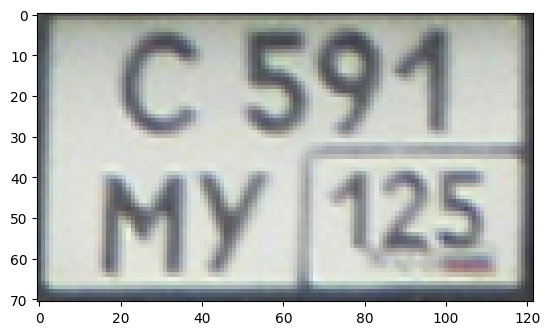

In [13]:
index = 7

plt.imshow(dataset[index][0].numpy().astype(np.uint8))
plt.show()